In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
dataset.rename(columns={'Customer Complaint': 'Complaints'}, inplace=True)
dataset.head()

,Ticket #,Complaints,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


<function matplotlib.pyplot.show(*args, **kw)>

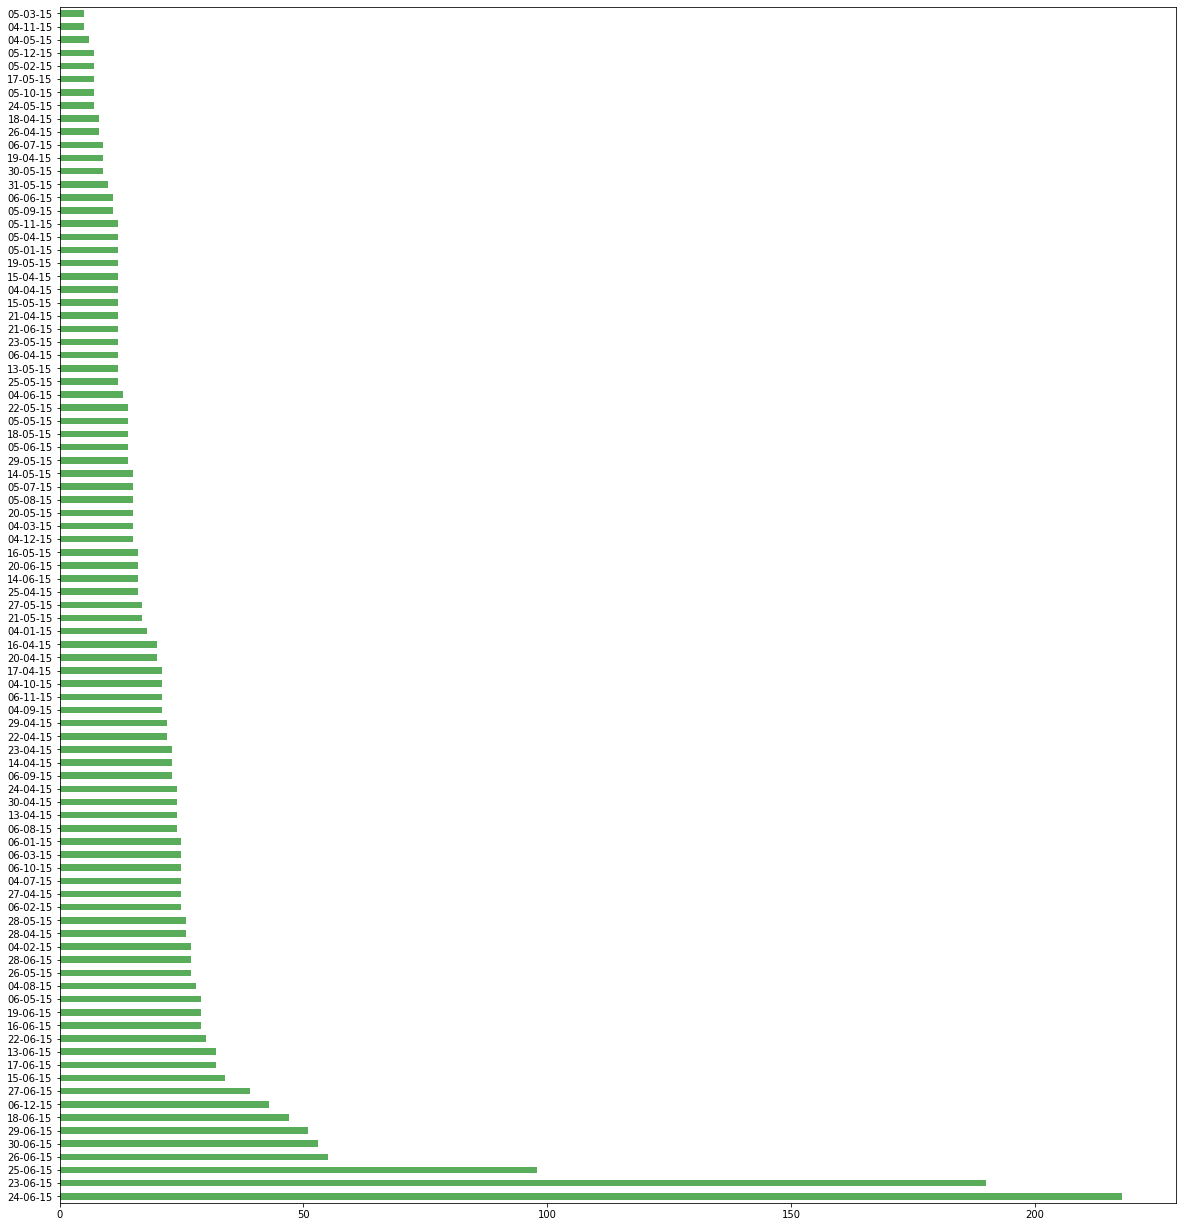

In [79]:
# daily granualarity chart for complaints
plt.figure(figsize=(20,22))
dataset.Date.value_counts().plot(kind= 'barh', color= 'g', alpha= .65)
plt.show


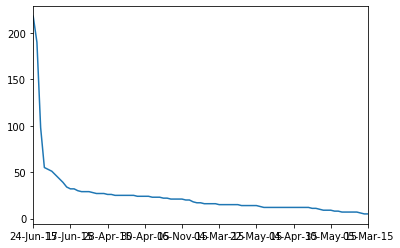

In [84]:
# monthly granualarity chart for complaints

dataset["Date_month_year"].value_counts().plot()



In [4]:
#frequency of complaint types
dataset.Complaints.value_counts()

Comcast                                                                                        83
Comcast Internet                                                                               18
Comcast Data Cap                                                                               17
comcast                                                                                        13
Comcast Data Caps                                                                              11
                                                                                               ..
charges for internet service are bogus                                                          1
increased bill                                                                                  1
Internet/Phone Billing Services                                                                 1
Comcast internet and lack of communication and response                                         1
Cannot Access Online

In [6]:
#CHange the status of Open and pending to Open and CLosed and solved to closed
dataset["Status"].replace('Open', 'Open', inplace=True)
dataset["Status"].replace('Pending', 'Open', inplace=True)
dataset["Status"].replace('Closed', 'Closed', inplace=True)
dataset["Status"].replace('Solved', 'Closed', inplace=True)

In [7]:
dataset.head()

,Ticket #,Complaints,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No


<function matplotlib.pyplot.show(*args, **kw)>

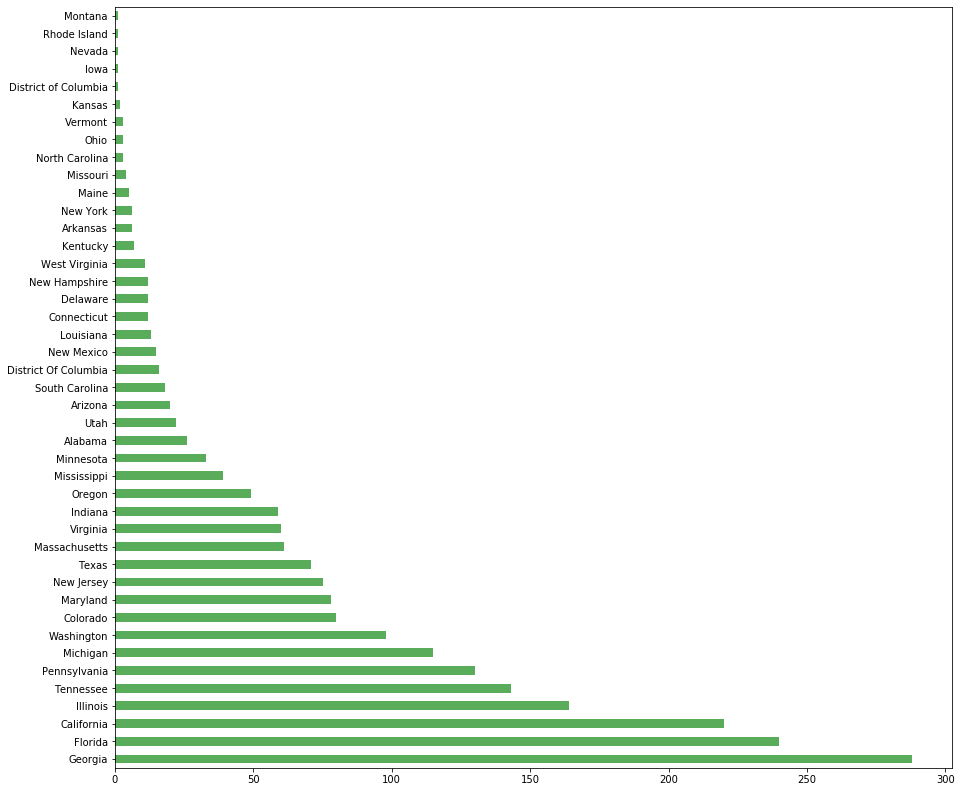

In [93]:
#Provide state wise status of complaints in a stacked bar chart.
plt.figure(figsize=(15,14))
dataset.State.value_counts().plot(kind= 'barh', color= 'g', alpha=.65, stacked=True)
plt.show

In [31]:
Unresolved_complaints = dataset.groupby('Status')

In [33]:
df_unresolved = Unresolved_complaints.get_group('Open')

<function matplotlib.pyplot.show(*args, **kw)>

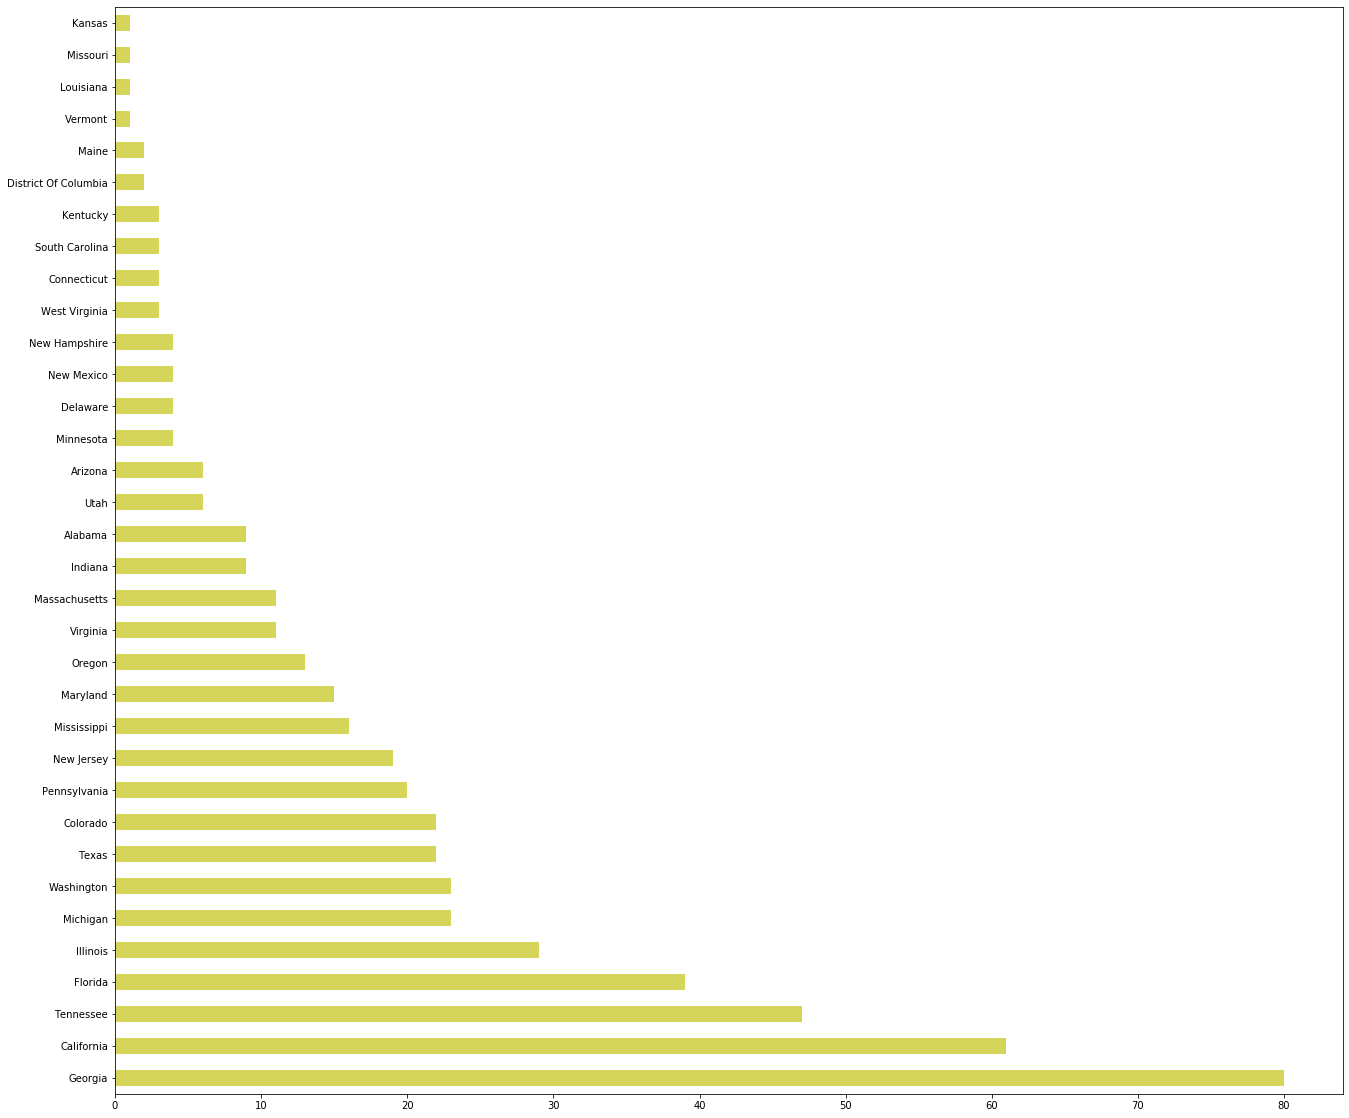

In [35]:
#State with highest number of unresolved complaints
plt.figure(figsize=(22,20))
df_unresolved.State.value_counts().plot(kind= 'barh', color= 'y', alpha= .65)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

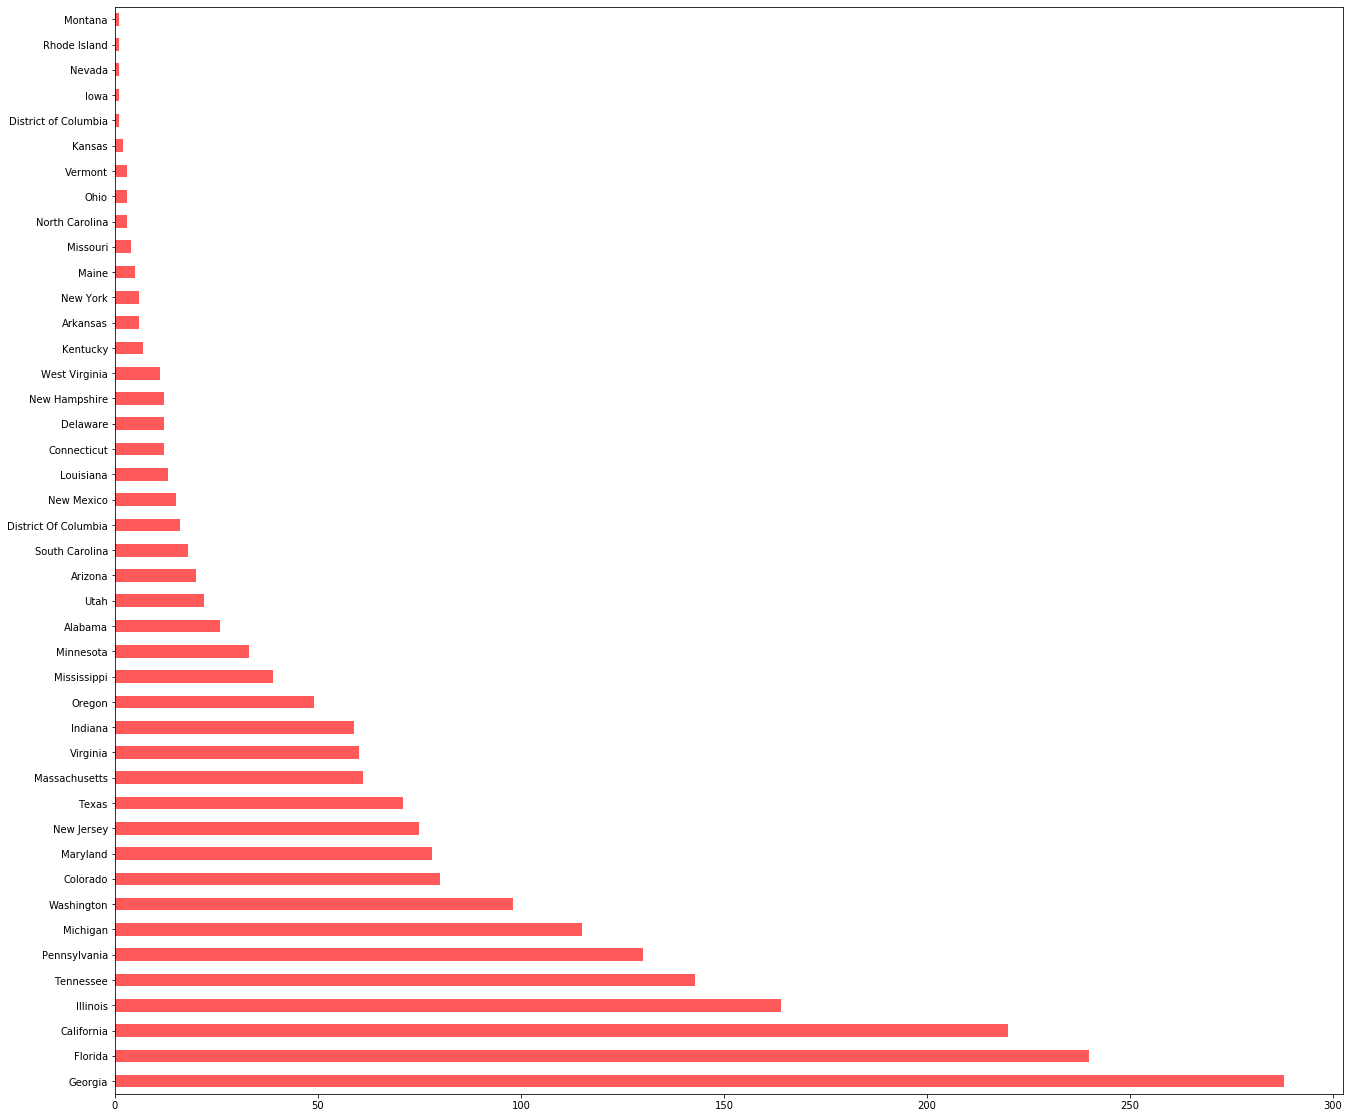

In [36]:
#State with max number of complaints
plt.figure(figsize=(22,20))
dataset.State.value_counts().plot(kind= 'barh', color= 'r', alpha= .65)
plt.show

In [92]:
#percentage of calls resolved till date which were recieved through internet calls

df_resolved_internet = dataset.groupby(['Received Via', 'Status']).size().unstack()
df_resolved_internet


Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262
